In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from nltk.stem.snowball import SnowballStemmer
from sklearn.grid_search import GridSearchCV
from nltk import word_tokenize
import seaborn as sn
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from itertools import chain
from collections import Counter

c:\users\m6800\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\m6800\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("Handelingen.csv", index_col=0)
df.head(5)

,achternaam,partij,tekst,file,datum,tags
107136,Wilders,PVV,\r\n \r\n Mevrouw de voo...,h-tk-20122013-100-3.xml,2013-06-26,"['Bestuur | Parlement', 'Financiën | Begroting']"
107137,Roemer,SP,\r\n \r\n Voorzitter. Vo...,h-tk-20122013-100-3.xml,2013-06-26,"['Bestuur | Parlement', 'Financiën | Begroting']"
107138,Pechtold,D66,\r\n \r\n Voorzitter. Tw...,h-tk-20122013-100-3.xml,2013-06-26,"['Bestuur | Parlement', 'Financiën | Begroting']"
107139,Van Haersma Buma,CDA,\r\n \r\n Voorzitter. Al...,h-tk-20122013-100-3.xml,2013-06-26,"['Bestuur | Parlement', 'Financiën | Begroting']"
107141,Van Haersma Buma,CDA,\r\n \r\n Dan het sociaa...,h-tk-20122013-100-3.xml,2013-06-26,"['Bestuur | Parlement', 'Financiën | Begroting']"


In [3]:
df.partij.value_counts()

SP              27034
D66             24600
VVD             22990
CDA             22452
PvdA            22217
PVV             16408
GroenLinks      12954
ChristenUnie    11401
SGP              6316
PvdD             4081
50PLUS           2223
Name: partij, dtype: int64

In [4]:
tokenizer = RegexpTokenizer(r'\w+')
tekst = chain.from_iterable([list(set([sbs.stem(t) for t in tokenizer.tokenize(doc)])) for doc in df.tekst])
count = Counter(tekst)
samples = list(count.values())

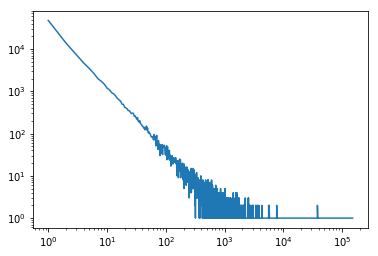

In [22]:
plt.loglog(x, y)
plt.show()

In [6]:
#pd.Series(samples).hist(bins=max(samples) + 1)

In [8]:
len(list(count.values()))

108861

In [17]:
t = Counter(samples)
t = sorted(t.items())
x, y = zip(*t)